In [ ]:
! git clone https://github.com/matteobreschi/bajes.git

In [ ]:
!pip install pycbc lalsuite ligo-common
!pip install gwpy

import gwpy
from gwpy.timeseries import TimeSeries

In [ ]:
%cd bajes
! ls
! python setup.py install

In [9]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bajes.obs.gw import Series
from bajes.obs.gw import Noise
from bajes.obs.gw.utils import read_asd


In [10]:
time_of_event = 1126259462

post_trigger_duration =4
duration = 8
analysis_start = time_of_event + post_trigger_duration - duration

# Use gwpy to fetch the open data
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

t = H1_analysis_data.times
strain = H1_analysis_data.value

# set the data properties coherently
seglen = 8           # duration of the segment [s]
srate  = 4096         # sampling rate [Hz]
t_gps  = 1126259462   # central value of GPS time
f_max  = 1024
f_min  = 20 

series = Series('time', strain, seglen=seglen, srate=srate, t_gps=t_gps, f_min=f_min, f_max=f_max)

from bajes.obs.gw import Noise
from bajes.obs.gw.utils import read_asd

fr_asd, asd = read_asd('GW150914', 'H1')
noise       = Noise(fr_asd, asd, f_min=0, f_max=f_max)

from bajes.obs.gw import Detector, Waveform

wave  = Waveform(series.freqs, srate, seglen, 'NRPM')

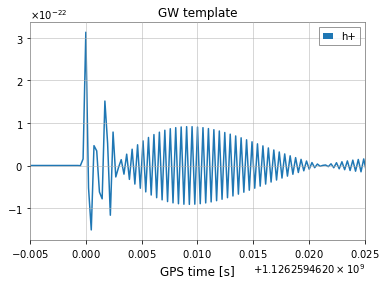

In [49]:

import math
import random

m1 = round(random.uniform(1, 3), 1)
m2 = round(random.uniform(1, 3), 1)

if m1 > m2:
  chirp_mass = (math.pow((m1 * m2), (3/5))) / (math.pow((m1 + m2), (1/5)))
  q = m1 / m2  #m1 has to be the bigger number
elif m1 < m2:
  while m1 < m2:
    m1 = round(random.uniform(1, 3), 1)
    m2 = round(random.uniform(1, 3), 1)
chirp_mass = (math.pow((m1 * m2), (3/5))) / (math.pow((m1 + m2), (1/5)))
q = m1 / m2  #m1 has to be the bigger number

params = {'mchirp'     : chirp_mass,    # chirp mass [solar masses] 
              'q'          : q,      # mass ratio 
              's1x'        : 0.,      # primary spin parameter, x component
              's1y'        : 0.,      # primary spin parameter, y component
              's1z'        : 0.,      # primary spin parameter, z component
              's2x'        : 0.,      # secondary spin parameter, x component
              's2y'        : 0.,      # secondary spin parameter, y component
              's2z'        : 0.,      # secondary spin parameter, z component
              'lambda1'    : 400.,    # primary tidal parameter 
              'lambda2'    : 400. ,    # secondary tidal parameter
              'distance'   : 100.8114416513031,    # distance [Mpc]   
              'iota'       : np.pi,   # inclination [rad]   
              'ra'         : 0.,     # right ascension [rad]
              'dec'        : 0.,   # declination [rad]
              'psi'        : 0.,      # polarization angle [rad]
              'time_shift' : 0.419,   # time shift from GPS time [s]
              'phi_ref'    : 0.,      # phase shift [rad]
              'f_min'      : 50.,     # minimum frequency [Hz]
              'srate'      : srate,   # sampling rate [Hz]
              'seglen'     : seglen,  # segment duration [s] 
              'tukey'      : 0.1,     # parameter for tukey window
              't_gps'      : t_gps, 
             }  # GPS trigger time

hpc = wave.compute_hphc(params)

plt.title('GW template')
plt.plot(series.times, hpc.plus, label = 'h+')
plt.xlabel('GPS time [s]')
plt.xlim((t_gps-0.005, t_gps+0.025))
plt.legend() 


dicti = params
dicti["m1"] = m1
dicti["m2"] = m2
dicti["mtot"] = round((m1 + m2), 1)
dicti["file name"] = "S00001.ipynb"

In [ ]:
'''import csv

csv_columns = {'file name','chirp mass', 'q', 's1x', 's1y', 's1z', 's2x', 's2y', 's2z', 
               'lamba1', 'lamba2', 'distance','iota', 'ra', 'dec', 'psi','time_shift',
               'phi_ref', 'f_min', 'srate', 'seglen', 'tukey', 't_gps', 'm1', 'm2', 'mtot'
               }


with open('metadata.csv', 'w') as csvfile:
  writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
  writer.writeheader()
  for values in dict.value():
    writer.writerow(value)'''
 

In [ ]:
import csv
import pandas as pd

df = pd.DataFrame.from_dict([dicti])
df.to_csv('metadata.csv', sep = '\t')
new_df = pd.read_csv('metadata.csv')